## Esercitazione di Potenziamento

Implementare le function necessarie per costruire il polinomio interpolante di Lagrange. 

                                                                [5 punti]
                                                         
                                                         

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def plagr(x,j):
    #x: vettore dei nodi di interpolazione
    xtilde = np.zeros_like(x)
    n = x.shape[0]
    
    if j==0:
        xtilde = x[1:n]
    else:
        xtilde = np.append(x[0:j], x[j+1:n])
        
    num = np.poly(xtilde)
    den = np.polyval(num, x[j])
    coeff = num / den
    return coeff

In [22]:
def interpL(x,y,xx):
    n = x.size
    m = xx.size
    L = np.zeros((m, n))
    for k in range(n):
        p = plagr(x, k)
        L[:,k] = np.polyval(p, xx)
    
    return L@y

Sia assegnata la funzione $f(x)=cos(\pi x)+sin(\pi x)$, $ x \in [0,2]$

facendo uso delle functions implementate precedentemente, si determini il polinomio p che interpola f nei nodi  x0 = 1, x1 = 1.5, x2 = 1.75.

                                                               [3 punti]

In [31]:
x = np.array([1, 1.5, 1.75])
f = lambda x: np.cos(np.pi*x) + np.sin(np.pi*x)
y = f(x)
xx = np.linspace(0, 2, 200)
polL = interpL(x,y,xx)

si rappresenti in uno stesso grafico la funzione f, il polinomio p e i punti di interpolazione assegnati;

                                                              [2 punti]

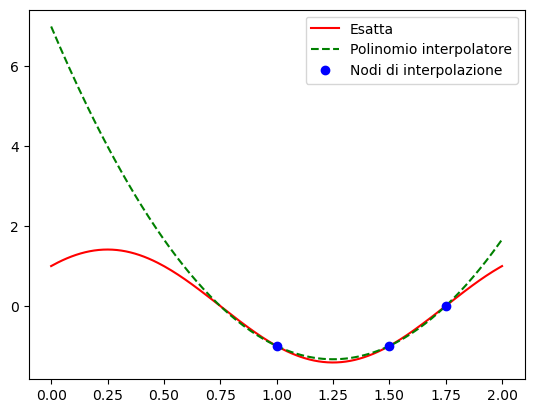

In [32]:
plt.plot(xx, f(xx), 'r-', xx, polL, 'g--', x, y, 'bo')
plt.legend(['Esatta', 'Polinomio interpolatore', 'Nodi di interpolazione'])

 si calcoli il valore assunto dalla funzione errore E(x) := |f(x) − p(x)| nel punto $x^∗$ = 0.75 e si definisca teoricamente da cosa dipende l'errore che si compie quando al posto del polinomio interpolatore si considera la funzione che ha generato i dati, commentando opportunamente la formula
 
                                                             [3 punti]

[2.22044605e-16]


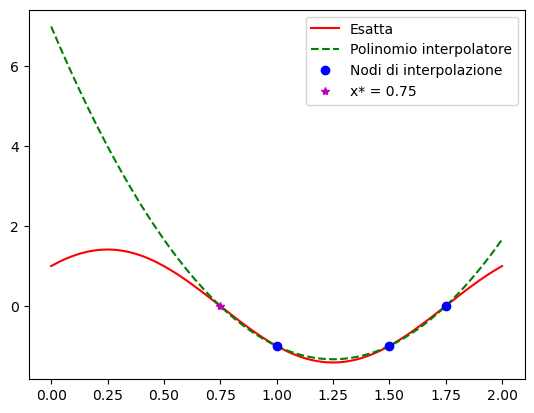

In [33]:
val075 = interpL(x,y,np.array([0.75]))
errore = np.abs(f(0.75) - val075)
print(errore)
plt.plot(xx, f(xx), 'r-', xx, polL, 'g--', x, y, 'bo', 0.75, val075, 'm*')
plt.legend(['Esatta', 'Polinomio interpolatore', 'Nodi di interpolazione', 'x* = 0.75'])
#il polinomio interpolatore interpola anche il punto x*
#l'errore è nullo se è un nodo di interpolazione

si stabilisca qual è il polinomio interpolatore per f passante per i nodi $x^*$ 
, x0, x1 e x2.


                                                            [2 punti]

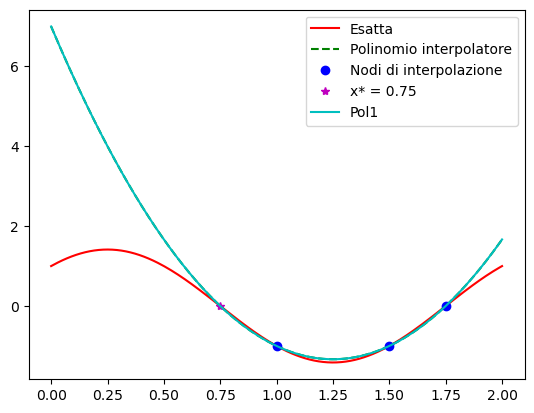

In [39]:
#Il polinomio che interpola x0,x1,x2 passa anche per x*, infatti l'errore è < della precisione di macchina(approssimato a 0)
#Altrimenti si ricalcola il polinomio per tutti e 4 i punti e si nota che coincidono
x1 = np.array([0.75, 1, 1.5, 1.75])
y1 = f(x1)
polL1 = interpL(x1,y1,xx)
plt.plot(xx, f(xx), 'r-', xx, polL, 'g--', x, y, 'bo', 0.75, val075, 'm*', xx, polL1, 'c')
plt.legend(['Esatta', 'Polinomio interpolatore', 'Nodi di interpolazione', 'x* = 0.75', 'Pol1'])
#Si nota che i due polinomi di interpolazione si sovrappongono

Si calcoli la costante di Lebesgue e si dica che ruolo svolge nell'ambito dell'interpolazione polinomiale

                                                             [3 punti]

In [58]:
def Lebesgue(x):
    sommaL = np.zeros_like(xx)  #vettore di zeri lungo come xx
    for j in range(n):
        p = plagr(x, j)
        L = np.polyval(p, xx)
        sommaL = sommaL + np.abs(L)
        
    return np.max(sommaL)

In [59]:
Lebesgue(polL)

1.3170943340731356e+78